http://www.nltk.org/book/ch04.html

## 4.1 
结构化对象的值，实际只是对象的引用

In [1]:
# bar 复制的是引用对象，不复制变量内容
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'Bodkin'
bar

['Monty', 'Bodkin']

In [3]:
nested = [[]]*3
nested[1].append('Python')
nested[2] = ['Monty']
nested

[['Python'], ['Python'], ['Monty']]

In [5]:
nested[1] = ['Python']
print nested[0] == nested[1]    #同值
print nested[0] is nested[1]   #不同对象

True
False


all() any()函数

In [8]:
sent = ['Invest', 'on', 'a', 'stock']
print all(len(w)>1 for w in sent)
print any(len(w)>1 for w in sent)

False
True


## 4.2 序列

元组

In [9]:
t = 'walk', 3 , 'fem'

In [10]:
t

('walk', 3, 'fem')

for item in reversed(s)   逆序遍历  
for item in set(s).different(t)   遍历在s不在t的元素  

In [13]:
string = "I walked through the stone road"
print tuple(string)

('I', ' ', 'w', 'a', 'l', 'k', 'e', 'd', ' ', 't', 'h', 'r', 'o', 'u', 'g', 'h', ' ', 't', 'h', 'e', ' ', 's', 't', 'o', 'n', 'e', ' ', 'r', 'o', 'a', 'd')


zip() and enumerate()

In [1]:
words = ['I', 'walked', 'through', 'the', 'stone', 'road']
tags =['noun', 'verb', 'prep', 'det', 'noun','noun']
zip(words, tags)

[('I', 'noun'),
 ('walked', 'verb'),
 ('through', 'prep'),
 ('the', 'det'),
 ('stone', 'noun'),
 ('road', 'noun')]

In [4]:
list(enumerate(words))

[(0, 'I'),
 (1, 'walked'),
 (2, 'through'),
 (3, 'the'),
 (4, 'stone'),
 (5, 'road')]

In [9]:
words = "I walked through the stone gate".split()
wordlens =[(len(word), word) for word in words]
wordlens.sort()
' '.join(w for (_, w) in wordlens)

'I the gate stone walked through'

第三行更高效，第二行需要在max()计算前分配链表对象存储空间

In [13]:
words = "I walked through the stone gate"
print max([w.lower() for w in nltk.word_tokenize(words)])
print max(w.lower() for w in nltk.word_tokenize(words))

walked
walked


## 4.3 程序风格

最长词

In [14]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

[u'unextinguishable',
 u'transubstantiate',
 u'inextinguishable',
 u'incomprehensible']

## 4.4 结构化编程

In [20]:
def get_text(file):
    """Read txt from file, normalizing whitespace and stripping HTML markup"""
    text = open(file).read()
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)

In [21]:
help(get_text)

Help on function get_text in module __main__:

get_text(file)
    Read txt from file, normalizing whitespace and stripping HTML markup



参数传递

In [22]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5

In [23]:
w = ''
p =[]
set_up(w,p)

In [24]:
print w
print p


['noun']


参数类型检查

In [1]:
def tag(word):
    assert isinstance(word, basestring), "argument must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [3]:
tag(['dog'])

AssertionError: argument must be a string

lambda 表达式

In [4]:
sent = ['Take', 'care', 'of', 'the', 'boy']
def extract(prop):
    return [prop(word) for word in sent]

In [5]:
extract(lambda w: w[-1])

['e', 'e', 'f', 'e', 'y']

In [8]:
sorted(sent, lambda x, y: cmp(len(x), len(y)))

['of', 'the', 'boy', 'Take', 'care']

yield 生成器

In [9]:
def search(sub, words):
    for word in words:
        if sub in word:
            yield word

In [12]:
for item in search('ea', ['tea', 'boy','meat']):
    print item,

tea meat


map函数

In [2]:
lengths = map(len, nltk.corpus.brown.sents(categories='news'))

In [5]:
map(lambda w: len( filter(lambda c: c.lower() in "aeiou", w) ), sent)

[2, 2, 1, 1, 1]

关键字参数

In [13]:
def generic(*args, **kwargs):
    print 'args', args
    print 'kwargs', kwargs

In [14]:
generic(1, "China", par = 'country')

args (1, 'China')
kwargs {'par': 'country'}


## 4.7 算法设计

### 构建字母查找树

In [2]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value']=value

In [18]:
trie = nltk.defaultdict(dict)

In [19]:
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')

In [20]:
trie = dict(trie)
pprint.pprint(trie)

{'c': {'h': {'a': {'t': {'value': 'cat'}},
             'i': {'e': {'n': {'value': 'dog'}}}}}}


### 全文检索系统

## 4.8 Python 库样例

In [42]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1. / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

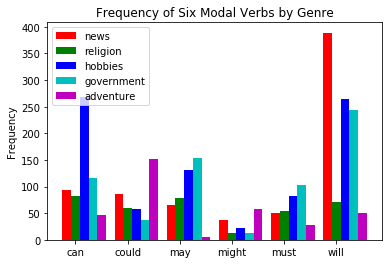

In [43]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
              (genre, word)
              for genre in genres
              for word in nltk.corpus.brown.words(categories=genre)
              if word in modals)
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

### NetworkX 结点和边组成的结构

In [33]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn 
from networkx.drawing.nx_agraph import graphviz_layout

In [34]:
def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)
def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G
def graph_draw(graph):
    nx.draw_graphviz(graph,
                    node_size=[16*graph.degree(n) for n in graph],
                    node_color= [graph.depth[n] for n in graph],
                    with_labels = False)
    matplotlib.pyplot.show()

In [35]:
#http://blog.csdn.net/sinat_29508201/article/details/51887446
#注意：如果使用networkx中的draw_graphviz仍然会报错AttributeError: ‘module’ object has no attribute ‘graphviz_layout’，
#这里在于版本中graphviz_layout位于nx.drawing.nx_graph层级下，而代码调用存在于nx.drawing.graphviz_layout
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

AttributeError: 'module' object has no attribute 'graphviz_layout'

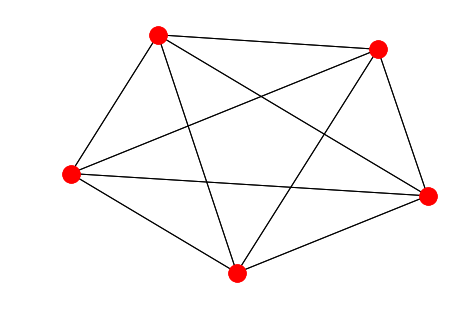

In [37]:
from matplotlib import pyplot as plt
G = nx.complete_graph(5)
pos = graphviz_layout(G)
nx.draw(G, pos)
plt.show()